In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%pip install -qU torch transformers sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.1 MB/s eta 0:00:00


# Imports

In [ ]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

# Load summaries

In [ ]:
summaries_path = Path("/content/drive/MyDrive/legal_ai/summaries")
summaries_paths = list(summaries_path.iterdir())
len(summaries_paths)

152

In [ ]:
summaries = {}
for summary_path in tqdm(summaries_paths):
    with open(summary_path, "r") as f:
        summaries[summary_path.stem] = f.read()

100%|██████████| 152/152 [00:00<00:00, 456.31it/s]


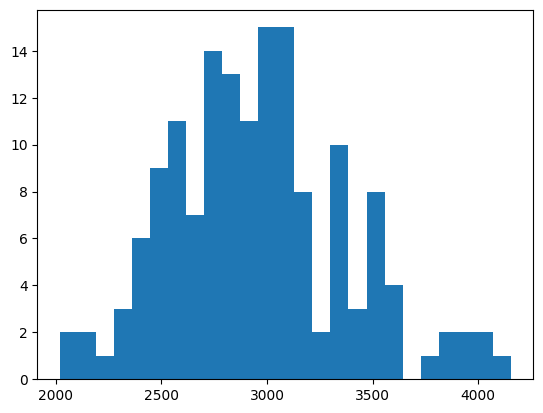

In [ ]:
plt.hist([len(s) for s in summaries.values()], bins=25);

# Calculate embeddings

We need to calculate embeddings beforehand and save them in order to not re-calculate

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
model = SentenceTransformer(model_name_or_path="deepvk/USER-bge-m3", device=device)

In [ ]:
embeddings = model.encode(
    list(summaries.values()),
    normalize_embeddings=True,
    batch_size=8,
    show_progress_bar=True,
    convert_to_numpy=True,
)

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
for uid, emb in tqdm(zip(summaries.keys(), embeddings)):
    summaries[uid] = {"text": summaries[uid], "emb": emb.tolist()}

152it [00:00, 32263.88it/s]


In [ ]:
with open("/content/drive/MyDrive/legal_ai/summaries_w_emb.json", "w") as f:
    json.dump(summaries, f)